# Pré-processamento e Salvamento dos Grupos de Palavras-chave

Neste notebook, iremos pré-processar os grupos de palavras-chave, contar quantos exemplos existem para cada grupo em nossa base de dados e, em seguida, salvar os grupos em um arquivo para uso futuro.

In [1]:
# Instalar dependências do python
%pip install nltk
%pip install spacy
#!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 7.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


## Importação das Bibliotecas Necessárias

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import re
import spacy
import matplotlib.pyplot as plt

In [3]:
# Instalar dependências do nltk e spacy
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Carregamento dos Dados

Nesta seção, carregamos os dados que serão usados para verificar a presença das palavras-chave.

In [4]:
# Carregando o DataFrame
df = pd.read_csv("./data/Leis de Sorocaba (Preprocessed).csv")

## Definição dos Grupos de Palavras-chave

Aqui, definimos os grupos de palavras-chave conforme fornecidos no anexo `Grupos temáticos de legislação`.

In [5]:
groups = {
    "orcamento_e_creditos": [
    # "leis_orcamentarias_e_creditos_adicionais": [
        "crédito adicional",
        "créditos adicionais",
        "crédito suplementar",
        "créditos suplementares",
        "diretrizes orçamentárias",
        "crédito especial",
        "créditos especiais",
        "crédito extraordinário",
        "créditos extraordinários",
        "plano plurianual",
        "fixa a despesa",
        "fixa despesa",
        "credito adicional",
        "creditos adicionais",
        "credito suplementar",
        "creditos suplementares",
        "credito especial",
        "creditos especiais",
        "credito extraordinario",
        "creditos extraordinarios",
        "dotação",
        "dotações",
        "orçamento",
        "orça a receita",
        "abre credito",
        "abre crédito",
        "abertura de crédito"
    ],
    "teor_tributario": [
        "tributário",
        "tributario",
        "tributária",
        "tributaria",
        "isenção",
        "isençao",
        "imposto",
        "taxa",
        "iss",
        "refis",
        "itbi",
        "iptu",
        "tributo",
        "dívida ativa",
        "contribuinte",
        "incentivo fiscal",
        "incentivos fiscais"
    ],
    "utilidade_publica": [
        # "desapropriação",
        # "desapropriacao",
        "utilidade pública",
        "utilidade publica"
    ],
    "dias_tematicos": [
        "semana",
        "feriado",
        "dia oficial",
        "dia municipal",
        "calendário oficial",
        "calendário de evento",
        "calendário municipal",
        "calendário do município",
        "institui o dia",
        "institui o mês",
        "institui no calendário",
        "institui no município o dia"
    ],
    "denominacoes": [
        "vias públicas",
        "via pública",
        "denomina",
        "denominação",
        "dá nome",
        "da nome",
        "dá o nome",
        "da o nome",
        "dá os nomes",
        "da os nomes",
        "nomeia",
        "nomenclatura"
    ],
    "estrutura_administracao": [
        "contratações temporárias",
        "contratação temporária",
        "plano de carreira",
        "quadro efetivo",
        "quadro de pessoal",
        "conselho municipal",
        "fundo municipal",
        "servidor",
        "estrutura administrativa",
        "cargo",
        "funcionalismo",
        "funcionário",
        "magistério",
        "abono",
        "vencimento",
        "pensão",
        "pensao",
        "aposentadoria",
        "cria escola",
        "conselho",
        "gratificação",
        "gratificacao",
        "aposentadora",
        "cria a secretaria",
        "cria a divisão",
        "cria o departamento",
        "cria a assessoria",
        "cria a escola",
        "cria escola",
        "contratação de pessoal",
        "ajuda de custo"
    ],
    "titulos_honorificos": [
        "cidadão honorário",
        "ordem municipal do",
        "comenda",
        "patrimônio cultural"
    ],
    "urbanismo_e_obras": [
        "construir",
        "plano diretor",
        "ocupação do solo",
        "arruamento",
        "trânsito",
        "urbanístico",
        "urbanismo",
        "construção",
        "ereção",
        "obra",
        "zona",
        "zoneamento",
        "loteamento",
        "distrito",
        "abastecimento de água",
        "aprova a planta",
        "rodoviário",
        "parcelamento do solo",
        "escriturar"
    ],
    "normas_sobre_bancos": [
        "agências bancárias"
    ],
    # "revogacoes_e_alteracoes": [
    "revogacoes": [
        "revoga o artigo",
        "revoga os artigos",
        "revoga o parágrafo",
        "revoga os parágrafos",
        "revoga o inciso",
        "revoga os incisos",
        "revoga a lei",
        "revoga as leis",
        "revoga a resolução",
        "revoga as resoluções",
        "revoga a alínea",
        "revoga as alíneas",
        "revoga lei",
        "revoga dispositivo",
        "revoga dispositivos",
        "revogação da lei",
        "revogação das leis",
        "revogação do artigo",
        "revogação dos artigos",
        "revogação do parágrafo",
        "revogação dos parágrafos",
        "revogação da alínea",
        "revogação das alíneas",
        "revogação do inciso",
        "revogação dos incisos",
    ],
    "alteracoes": [
        "altera a lei",
        "altera as leis",
        "altera o artigo",
        "altera os artigos",
        "altera dispositivo",
        "altera o dispositivo",
        "altera dispositivos",
        "altera os dispositivos",
        "altera a alínea",
        "altera o parágrafo",
        "altera os parágrafos",
        "altera o §",
        "altera os §§",
        "altera o inciso",
        "altera os incisos",
        "altera as alíneas",
        "altera a redação",
        "altera redação",
        "altera ementa",
        "altera as redações",
        "alteração da lei",
        "alteração das leis",
        "alteração do artigo",
        "alteração dos artigos",
        "alteração do dispositivo",
        "alteração dos dispositivos",
        "alteração da alínea",
        "alteração da redação",
        "alteração do parágrafo",
        "alteração dos parágrafos",
        "alteração do §",
        "alteração dos §§",
        "alterações na lei",
        "alterações nas leis",
        "dá nova redação",
        "da nova redação",
        "modifica a lei",
        "modifica o artigo",
        "modifica o dispositivo",
        "modifica a alínea",
        "modifica dispositivo",
        "acrescenta o artigo",
        "acrescenta o dispositivo",
        "acrescenta o parágrafo",
        "acrescenta os parágrafos",
        "acrescenta o §",
        "acrescenta os §§",
        "acrescenta o inciso",
        "acrescenta a alínea",
        "acrescenta artigo",
        "acrescenta dispositivo",
        "acrescenta parágrafo",
        "acrescenta §",
        "acrescenta §§",
        "acrescenta inciso",
        "acrescenta alínea"
    ],
    "convenios": [
        "celebração do convênio",
        "celebração de convênio",
        "celebrar convênio",
        "celebrar convênios",
        "celebre convênio",
        "firmar convênio",
        "firmar o convênio",
        "assinar convênio",
        "assinar o convênio",
        "termo de convênio"
    ]
}

## Pré-processamento dos Grupos

Nesta seção, realizamos o pré-processamento das palavras-chave em cada grupo para garantir consistência ao verificar sua presença nos dados.

In [6]:
# Recuperar lista de stopwords em português
stopwords = nltk.corpus.stopwords.words('portuguese')

# Remover stopwords
def remove_stopwords(text):
  words = word_tokenize(text)

  stop = set(stopwords)
  filtered_sentence = [w for w in words if w not in stop]

  # Juntar os tokens novamente em formato de texto
  return " ".join(filtered_sentence)

for group, keywords in groups.items():
    groups[group] = [remove_stopwords(keyword) for keyword in keywords]


In [7]:
# Recuperar lista de stopwords em português
stopwords = nltk.corpus.stopwords.words('portuguese')

# Remover stopwords
nlp = spacy.load("pt_core_news_lg")
stop = set([word for word in nltk.corpus.stopwords.words('portuguese')])

def lemmatize_and_remove_stopwords(text):
    # Processa o texto com o Spacy
    doc = nlp(text)
    # Removendo stopwords e depois lematizando
    sentence = [token.lemma_ for token in doc if token.text.lower() not in stop]
    # Juntar os tokens novamente em formato de texto
    sentence = " ".join(sentence).lower().strip()
    return re.sub(r'\s+', ' ', sentence)

for group, keywords in groups.items():
    groups[group] = [lemmatize_and_remove_stopwords(keyword) for keyword in keywords]


In [8]:
groups

{'orcamento_e_creditos': ['crédito adicional',
  'crédito adicional',
  'crédito suplementar',
  'crédito suplementar',
  'diretriz orçamentário',
  'crédito especial',
  'crédito especial',
  'crédito extraordinário',
  'crédito extraordinário',
  'plano plurianual',
  'fixo despesa',
  'fixo despesa',
  'credito adicional',
  'credito adicional',
  'creditar suplementar',
  'credito suplementar',
  'creditar especial',
  'credito especial',
  'creditar extraordinario',
  'credito extraordinario',
  'dotação',
  'dotação',
  'orçamento',
  'orça receitar',
  'abrir credito',
  'abrir crédito',
  'abertura crédito'],
 'teor_tributario': ['tributário',
  'tributario',
  'tributário',
  'tributar',
  'isenção',
  'isençao',
  'impor',
  'taxa',
  'iss',
  'refis',
  'itbi',
  'iptu',
  'tributo',
  'dívida ativo',
  'contribuinte',
  'incentivo fiscal',
  'incentivo fiscal'],
 'utilidade_publica': ['utilidade público', 'utilidade publicar'],
 'dias_tematicos': ['semana',
  'feriado',
  '

## Alocação de Leis para Cada Grupo

Vamos agora colocar colunas binárias que indicam se uma lei pertence a um grupo ou não. Uma lei talvez pertença a mais de um grupo.

Em seguida vamos ver quantos exemplos existem para cada grupo em nossa base de dados.

In [9]:
# Adicionando colunas para cada grupo temático
for group_name in groups:
    df[group_name] = False

# Preenchendo as colunas com True se a ementa pertence ao grupo
for group_name, keywords in groups.items():
    regex_group = ['(?:^|\W)' + re.escape(keyword) + '(?:$|\W)' for keyword in keywords]
    group_rows = df['summary'].str.contains('|'.join(regex_group), case=False, na=False, regex=True)
    df.loc[group_rows, group_name] = True

In [10]:
# Exibindo o DataFrame atualizado
with pd.option_context('display.max_columns', None):
    display(df.head())

,summary,orcamento_e_creditos,teor_tributario,utilidade_publica,dias_tematicos,denominacoes,estrutura_administracao,titulos_honorificos,urbanismo_e_obras,normas_sobre_bancos,revogacoes,alteracoes,convenios
0,dispor sobre denominação josé antonio pascoto ...,False,False,False,False,True,False,False,False,False,False,False,False
1,dispor sobre denominação vitor hage via públic...,False,False,False,False,True,False,False,False,False,False,False,False
2,dispor sobre denominação lisardo cunha dia via...,False,False,False,False,True,False,False,False,False,False,False,False
3,dispor sobre denominação desirre ferraz cardos...,False,False,False,False,True,False,False,False,False,False,False,False
4,instituir calendário oficial município dia soc...,False,False,False,True,False,False,False,False,False,False,False,False


In [11]:
def count_group_occurrences(df, groups):
    count = {}
    for group_name in groups:
        count[group_name] = df[group_name].sum()
    return count

Agora, exibimos a quantidade de documentos que contêm as palavras-chave de cada grupo.

In [12]:
count = count_group_occurrences(df, groups)

for group, quantity in count.items():
    print(f"{group}: {quantity} documentos")

orcamento_e_creditos: 350 documentos
teor_tributario: 293 documentos
utilidade_publica: 841 documentos
dias_tematicos: 277 documentos
denominacoes: 5162 documentos
estrutura_administracao: 853 documentos
titulos_honorificos: 17 documentos
urbanismo_e_obras: 584 documentos
normas_sobre_bancos: 14 documentos
revogacoes: 242 documentos
alteracoes: 1292 documentos
convenios: 479 documentos


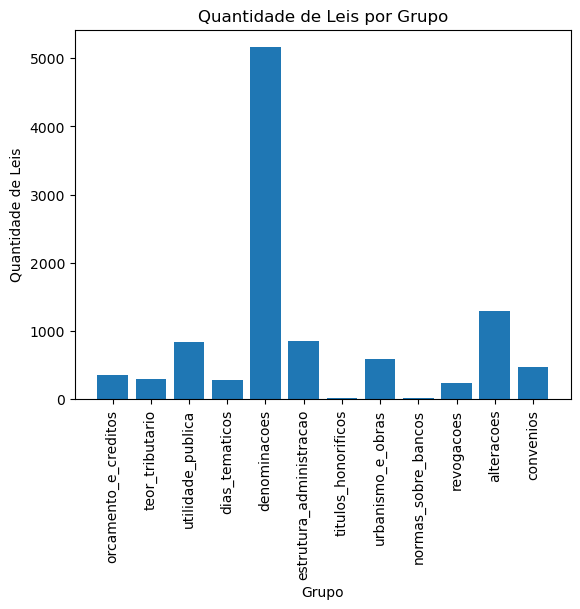

In [13]:
# Nomes dos grupos
groups = list(count.keys())

# Quantidades para cada grupo
quantities = list(count.values())

# Criando o gráfico de barras
plt.bar(groups, quantities)

# Adicionando títulos e rótulos
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Leis')
plt.title('Quantidade de Leis por Grupo')
plt.xticks(rotation='vertical')

# Mostrando o gráfico
plt.show()

Vamos verificar exemplos de cada grupo.

In [14]:
with pd.option_context('display.max_colwidth', None):
    for group_name, keywords in groups.items():
        regex_group = ['(?:^|\W)' + re.escape(keyword) + '(?:$|\W)' for keyword in keywords]
        group_rows = df[df['summary'].str.contains('|'.join(regex_group), case=False, na=False, regex=True)]
        
        print(f"Exemplos do grupo '{group_name}':")
        display(group_rows[['summary']])
        print("\n" + "="*50 + "\n")

AttributeError: 'list' object has no attribute 'items'

## Verificação de ementas sem grupos

In [ ]:
df.count()

summary                                         12777
leis_orcamentarias_e_creditos_adicionais        12812
teor_tributario                                 12812
titulo_de_utilidade_publica                     12812
dias_tematicos                                  12812
denominacoes_de_proprios_publicos               12812
estrutura_administracao_publica_e_servidores    12812
titulos_honorificos                             12812
urbanismo_e_obras                               12812
normas_sobre_bancos                             12812
revogacoes                                      12812
alteracoes                                      12812
convenios                                       12812
dtype: int64

In [ ]:
total_grouped = sum(count.values())
print(f"Total: {total_grouped} agrupamentos encontrados")

Total: 10404 agrupamentos encontrados


Temos mais ementas de leis do que exemplos de grupos. Isso quer dizer que temos ementas que não foram aplicadas a nenhum grupo. Vamos examinar o que houve e aprimorar nosso dicionário.

In [ ]:
not_grouped = df[~df['summary'].str.contains('|'.join([re.escape(item) for sublist in groups.values() for item in sublist]), case=False, na=False, regex=True)]

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(not_grouped[['summary']].sample(50, random_state=42))

,summary
1747,incluir artigo # lei nº # token_data regular prazo limpeza terreno baldio caso situação emergência calamidade público
6020,autorizar executivo municipal permutar imóvel deter posse particular dar outro providência
11284,retificar redação artigo # lei nº # token_data
10320,dispor sobre criação assessoria cadastramento incra dar outro providência
12802,dispor sobre concessão auxílio
6613,dispor sobre diretriz elaboração execução lei orçamentário anual # dar outro providência
11100,autorizar prefeito municipal expedir carta habitação
12604,dispor sobre aquisição terreno doação puro simples
4713,dispor sobre fiscalização vigilância sanitário serviço tatuagem aplicação piercing disciplina local apropriar adotar medida proteção sanitário dar outro providência
6595,tornar obrigatório concurso público anular concluir devolução valor pagar título inscrição


## Salvando os Grupos em um Arquivo

Finalmente, salvamos os grupos pré-processados em um arquivo para recuperação futura.

In [ ]:
df.to_csv("./data/Leis de Sorocaba (Pre-Grouped).csv", index=False)